
# Project: No Show Appointments Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data analysis explores a file containing data for 100,000 medical appointments in Brazil. Several variables are provided in the data set, from which 3 key independent variables and one dependent variable have been selected for analysis: the dependent variable being whether or not the patient showed up to their appointment, with the 3 independent variables being age of the patient, gender of the patient, and neighborhood of the patient. These 3 independent variables were chosen due to a hypothesis that these variables may be influential in determining whether patients make it to their appointments. By analyzing this data,important insights may be provided, lending to future in-depth analysis for relevant inferences. Inferential statistics, however, are beyond the scope of this project, and so results are limited to observations of correlation that do not necessarily imply causation.

This project will explore the following 3 questions:

1. Can knowing a patient's age help us to predict whether they will show up for their scheduled appointment?

2. Can knowing a patient's gender help us to predict whether they will show up for their scheduled appointment?

2. Can knowing the neighnorhood that a patient is from help us to predict whether they will show up for their scheduled appointment?

Below, NumPy, Pandas, MatPlotLib, and Seaborn have been imported to optimize code execution speed and graph style. 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, data has been sorted in order to gain insights into necessary data cleaning, and then trimmed and cleaned to ensure accurate analysis.  



### General Properties

Below, the dataframe is loaded using the Pandas csv reader, and the top rows are printed to provide insights into data arrangements in the file. 

In [9]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


From this, it is evident that binary codes have been used to indicate nominal data on scholarships, hypertension, diabetes, alcoholism, handicap, and SMS; however categorical object data of 'Yes' or 'No' has been used to indicate whether or not patients showed up for an appointment. I will later update that to integer data which will make it easier to compute statistics. Below, the shape, descriptive statistics, and general info will be printed for further understanding of the data.

In [10]:
df.shape

(110527, 14)

In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


After seeing these reports, it seems that the PatientId and AppointmentID columns will cause messy, unnecessary and nonsensical graphs, and should be dropped. They will be dropped in the data cleaning process. The ScheduleDay and Appointment Day columns will also be dropped, as they will not be used in analysis (and to clear up visual space in the data sheet.) Below is a print out of the column names to ensure that each column name will be compatable with filter codes used in later statistical analysis. 

In [13]:
list(df.columns.values)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

The column No-show will need to be renamed to NoShow in the data cleaning section in order to avoid problems in executing filters for graphing statistics. Next, the data will be checked for any duplicate rows that may need to be dropped to avoid inaccurate analysis.

In [14]:
sum(df.duplicated())

0

No duplicate rows are present, and so no rows will need to be dropped. Below is a print out of histograms for numerical columns of the data set, printed to gain an overall feel for each columns' attributes. 

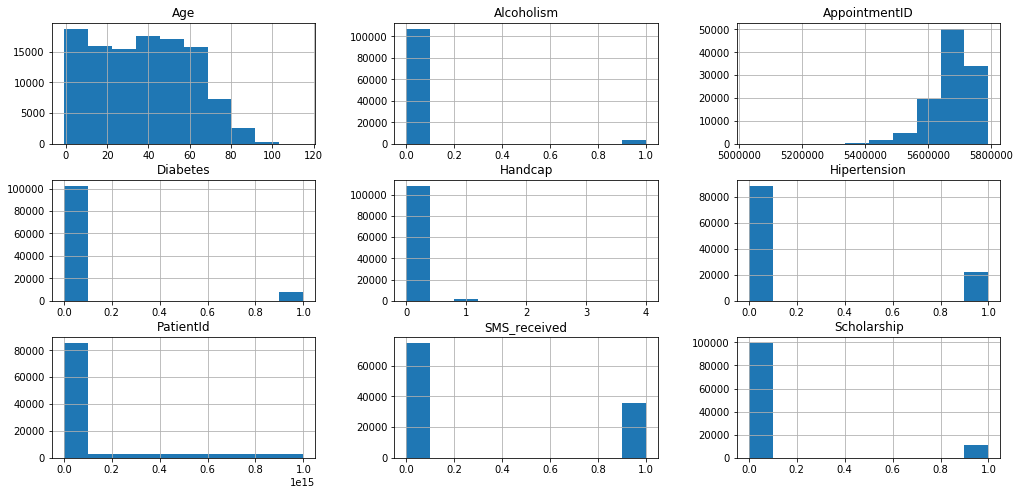

In [15]:
df.hist(figsize =(17,8));


### Data Cleaning -Below, all aforementioned necessary data cleaning steps will be executed. 

In [16]:
df.rename(columns={'No-show': 'NoShow'}, inplace=True)

In [17]:
list(df.columns.values)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'NoShow']

The No-Show column has been renamed to NoShow, and the results printed to guarantee the update. 

In [18]:
df = df.replace({'NoShow': {'Yes': True, 'No': False}})

In [19]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,False
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,False
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,False
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,False
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,False


In [20]:
df.NoShow = df.NoShow.astype(int)

Here, the 'Yes' and 'No' categorical object data has been replaced with integers for use in statistical computations.

In [21]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)

Here, all columns which were clouding up visual space and were not going to be used were removed.

In [22]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0


A sample of the first 5 rows of data was again printed to guarantee the updates. 

In [23]:
df['Age'] = df['Age'].astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
Gender           110527 non-null object
Age              110527 non-null float64
Neighbourhood    110527 non-null object
Scholarship      110527 non-null int64
Hipertension     110527 non-null int64
Diabetes         110527 non-null int64
Alcoholism       110527 non-null int64
Handcap          110527 non-null int64
SMS_received     110527 non-null int64
NoShow           110527 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 8.4+ MB


Finally, the Age column data were converted from integers to floats. The data information was printed to guarantee results of the update. 

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Can knowing a patient's age help us to predict whether they will show up for their scheduled appointment?

Here, a filter has been created for use in statistical computations and graph creation. It filters based on whether a patient showed up to their appointment (showedup) or did not (didntshowup).

In [35]:
#These variables can be used in computations to filter through data for those who showed up to their appointments and those who did not.
didntshowup = df.NoShow == True
showedup = df.NoShow == False

In [58]:
def get_didnt_show_mean ():
    return df.Age[didntshowup].mean()

In [59]:
get_didnt_show_mean()

34.317666562121957

In [60]:
def get_showed_up_mean ():
    return df.Age[showedup].mean()

In [61]:
get_showed_up_mean()

37.790064393252315

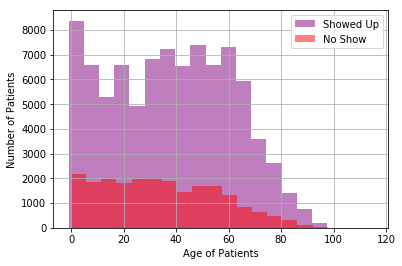

In [40]:
#This returns a histogram of the age distribution of patients, showing any differences between those who did and did not show up.
df.Age[showedup].hist(alpha=0.5, bins=20, label = 'Showed Up',color = 'purple')
df.Age[didntshowup].hist(alpha=0.5,bins=20, label = 'No Show',color = 'red')
plt.legend()
plt.xlabel('Age of Patients')
plt.ylabel('Number of Patients');

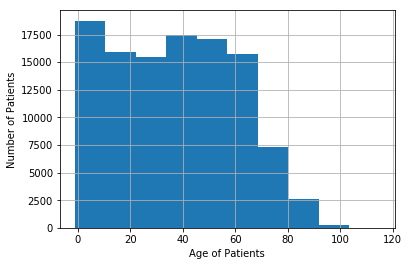

In [41]:
#This returns the overall age distribution of patients in the data sheet.
df['Age'].hist()
plt.xlabel('Age of Patients')
plt.ylabel('Number of Patients');

The age distribution pattern looks fairly similar for those who did and did not show up to their appointments, indicating that age is most likely not a very influential factor for likelihood of patients showing up to their appointments. However, it does look like patients in their teens and mid-to-late 20s were a bit less likely to show up than other age groups. Still, we most likely cannot predict whether or not a patient will show up to their appointment based on age. 

### Research Question 2: Can knowing a patient's gender help us to predict whether they will show up for their scheduled appointment?

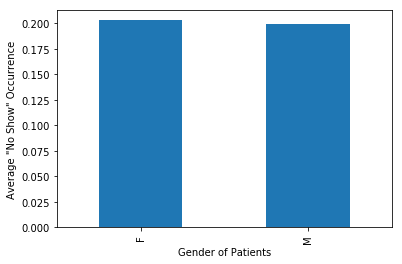

In [46]:
#This returns a bar chart that groups the gender results from the No Show column in the data sheet.
df.groupby('Gender').NoShow.mean().plot(kind='bar')
plt.xlabel('Gender of Patients')
plt.ylabel('Average "No Show" Occurrence');

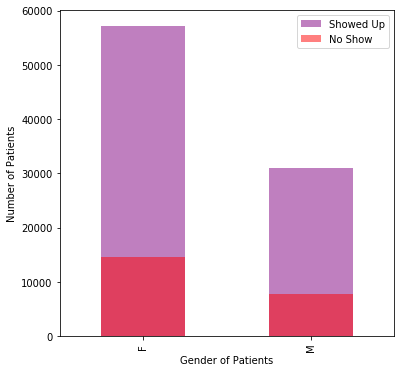

In [49]:
#This returns a chart comparing the number of patients who did and did not show up to their appointments, grouped by gender. 
df.Gender[showedup].value_counts().plot(kind = 'bar',alpha=0.5,figsize = (6,6),label = 'Showed Up',color='purple')
df.Gender[didntshowup].value_counts().plot(kind = 'bar', alpha=0.5,figsize = (6,6),label = 'No Show', color='red')
plt.legend()
plt.xlabel('Gender of Patients')
plt.ylabel('Number of Patients');

It looks like there were more female patients overall, and that of the females, a slightly higher percentage were "no show" patients. We most likely cannot predict whether or not a patient will show up based on their gender. 

### Research Question 3: Can knowing the neighnorhood that a patient is from help us to predict whether they will show up for their scheduled appointment?

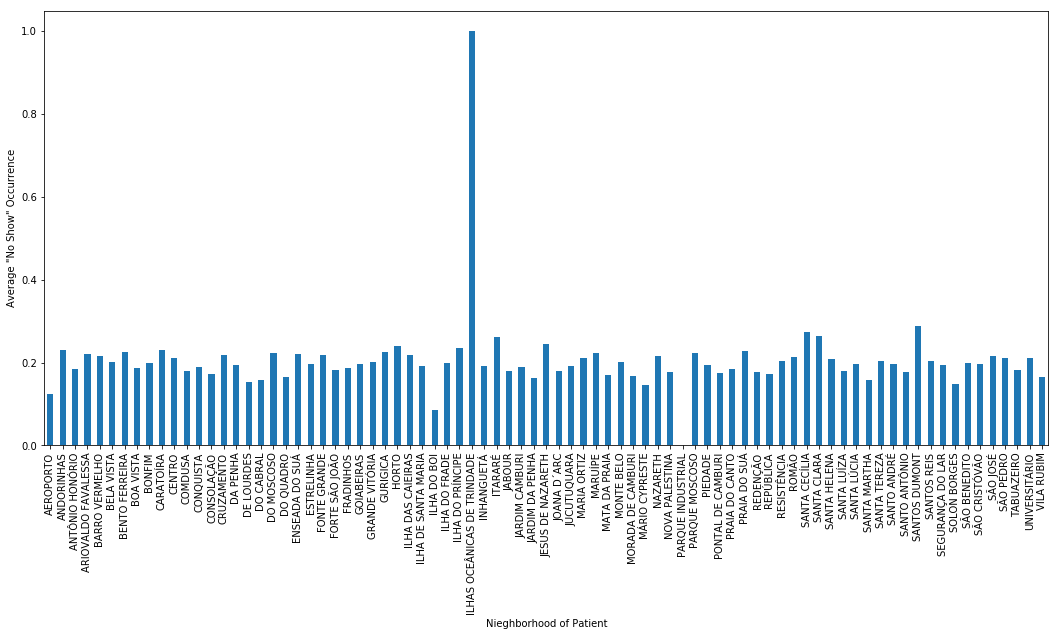

In [51]:
#The returns a bar chart showing the mean of "no shows" grouped by patient neighborhoods. 
df.groupby('Neighbourhood').NoShow.mean().plot(figsize = (18,8),kind='bar')
plt.xlabel('Nieghborhood of Patient')
plt.ylabel('Average "No Show" Occurrence');

From this chart, it looks like patients from the neighbourhood of Ilhas Oceanicas De Trinidade are significantly more likely to not show up to their scheduled appointments. 

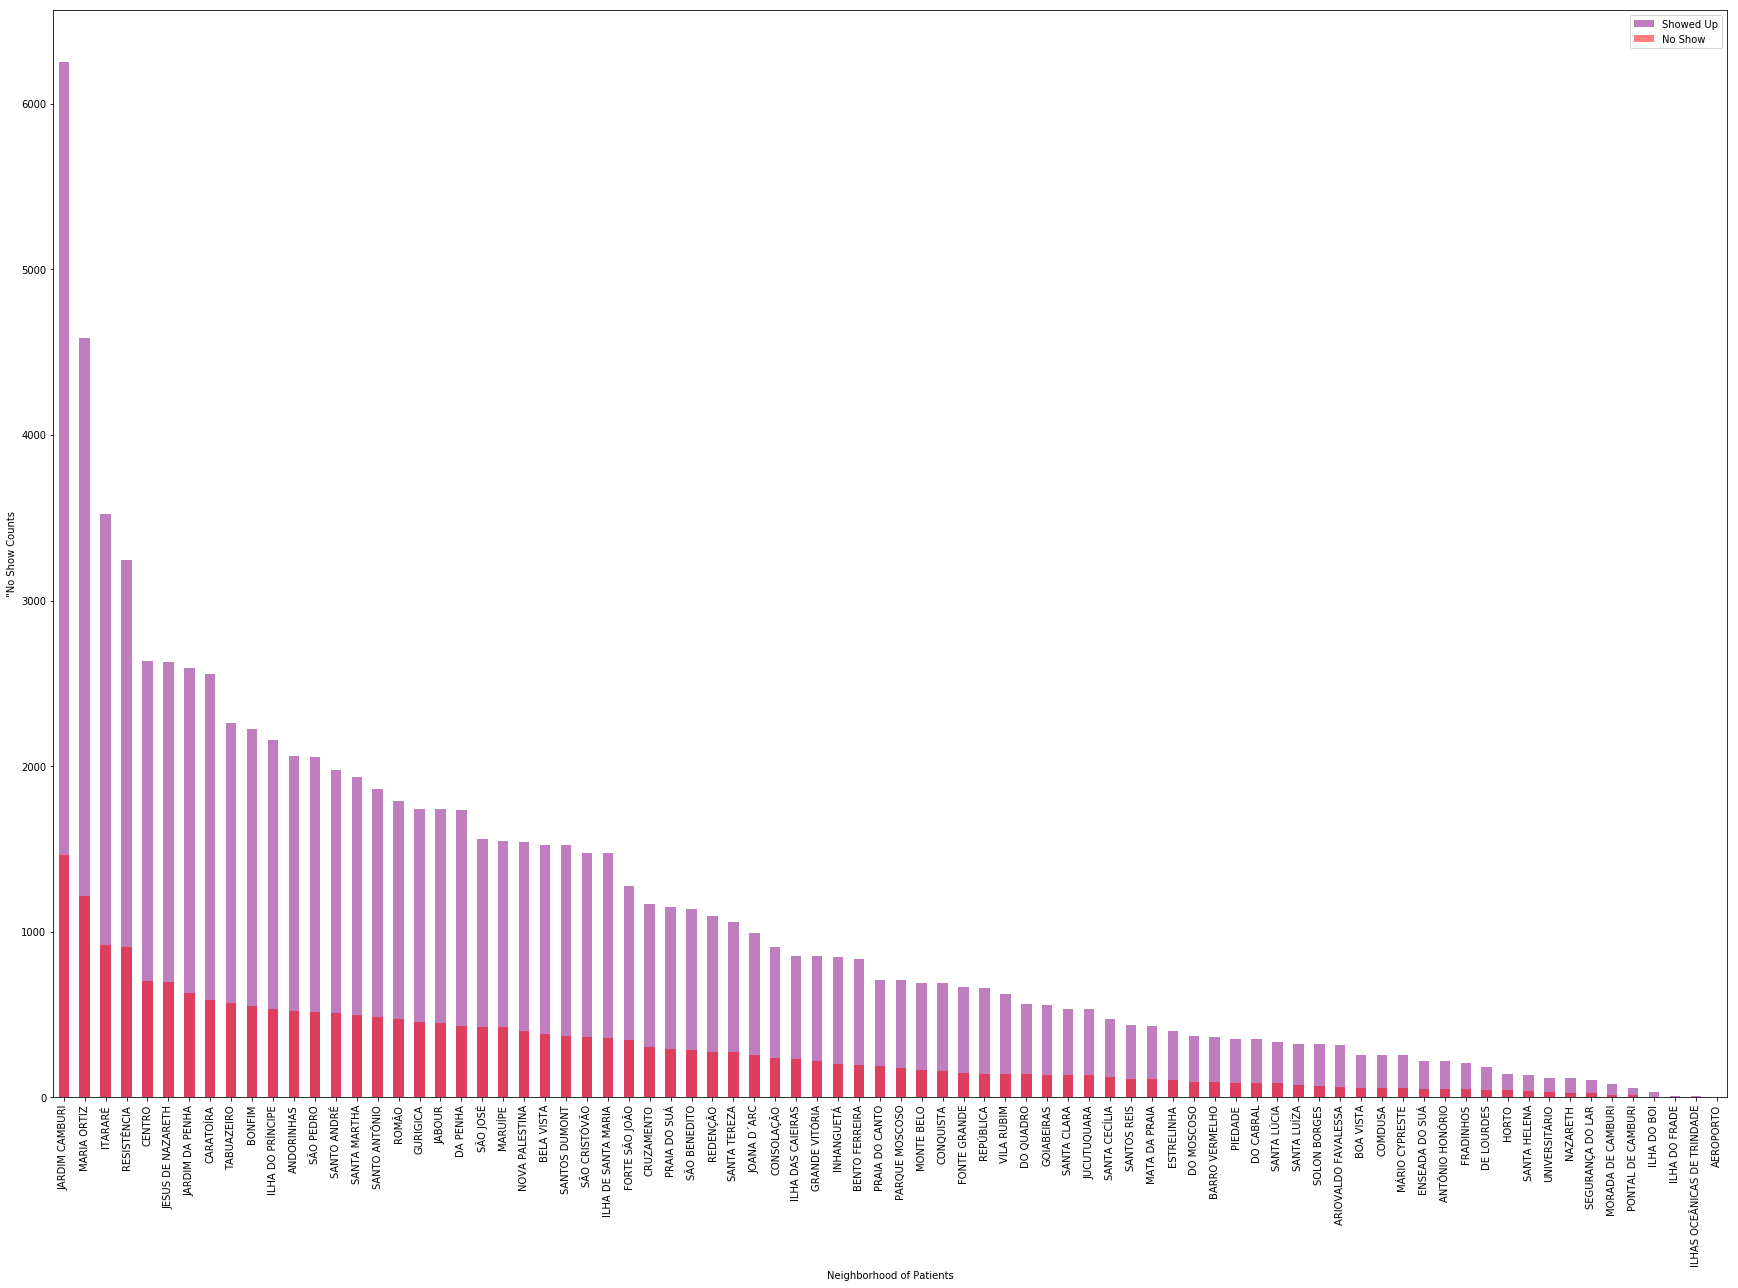

In [53]:
#this returns a bar chart of the number of patients from each neighborhood who did and did not show up to their appointments. 
df.Neighbourhood[showedup].value_counts().plot(kind = 'bar',alpha=0.5,figsize = (30,20),label = 'Showed Up',color='purple')
df.Neighbourhood[didntshowup].value_counts().plot(kind = 'bar', alpha=0.5,figsize = (30,20),label = 'No Show', color='red')
plt.legend()
plt.xlabel('Neighborhood of Patients')
plt.ylabel('"No Show Counts');


This chart indicates that the neighborhood a patient is from is a very strong factor in predicting whether or not they will show up to their appointments. 

Both of these point to a strong correlation between the neighborhood that a patient is from and the likelihood that they will show up to their appointments. Therefore, based on this data, it seems knowing the nighborhood that a patient is from can help us to predict whether or not they will show up to an appointment. However, further analysis would need to be done to determine the statistical significance of the correlation. 

<a id='limitations'></a>
## Limitations

The results of this research were limited to insights that could be gleaned from the provided data sheet alone. Documentation regarding background information such as scholarship details and categories of handicap patients was not provided, which limited the scope of research questions. The research is also limited to correlation observations in descriptive statistics, and could be more accurately explored with inferential statistics.   


<a id='conclusions'></a>
## Conclusions


After exploring this data file containing data for 100,000 medical appointments in Brazil; focusing on the relationships between the 3 independent variables of age, gender, and neighborhood and the dependent variable of "show" versus "no show", it was discovered that age and gender may not have very strong correlations with likelihood of a patient missing a scheduled appointment, but that the neighborhood the patient is from may have a very strong effect. These observations, based on descriptive statistics alone, are inconclusive and should be understood only as direction towards further research involving inferential statistics. The results here are limited to observations of correlation that do not necessarily imply causation.